<a href="https://colab.research.google.com/github/Gamearonx/EDA/blob/main/KC_ENB2012.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
ENB2012_data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [7]:
df = pd.read_csv("/content/drive/My Drive/EDA Assignment Files/Assignments/ENB2012_data.csv")

In [8]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


Data conversion not required

Duplicates

In [10]:
duplicates = df.duplicated().sum()
print(f"Duplicate Rows: {duplicates}")

Duplicate Rows: 0


# Missing Values

In [11]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64


# OUTLIERS

In [12]:
def remove_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [13]:
df_cleaned = remove_outliers_iqr(df)
print(f"Rows removed due to outliers: {df.shape[0] - df_cleaned.shape[0]}")

Rows removed due to outliers: 0


# Normalization

In [14]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

# Visualization

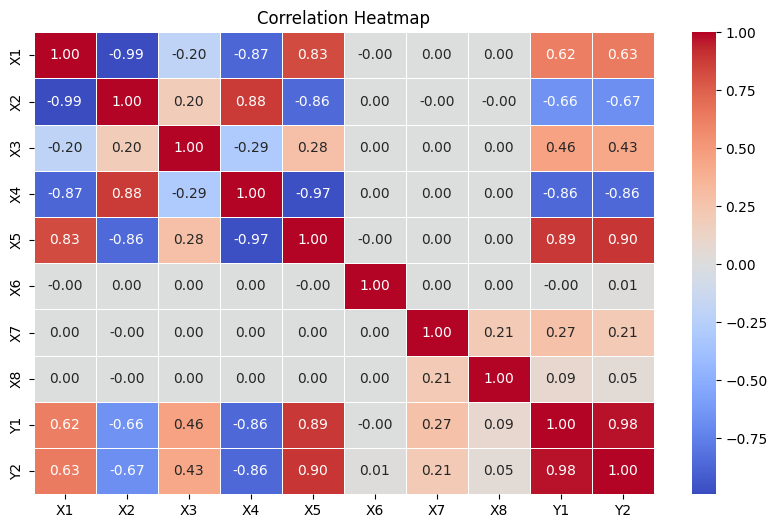

In [15]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_scaled.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Text(0.5, 1.0, 'X2 vs. Y1')

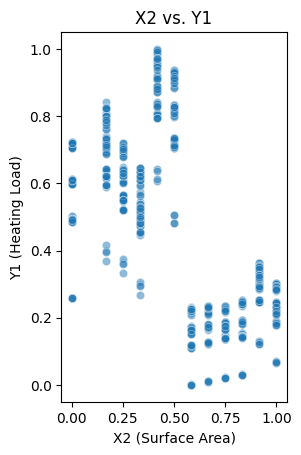

In [16]:
# Scatter plot for Y1
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_scaled["X2"], y=df_scaled["Y1"], alpha=0.5)
plt.xlabel("X2 (Surface Area)")
plt.ylabel("Y1 (Heating Load)")
plt.title("X2 vs. Y1")

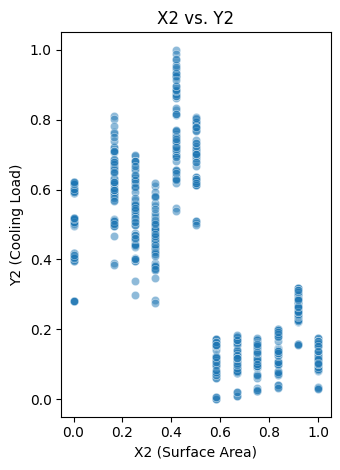

In [17]:
# Scatter plot for Y2
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_scaled["X2"], y=df_scaled["Y2"], alpha=0.5)
plt.xlabel("X2 (Surface Area)")
plt.ylabel("Y2 (Cooling Load)")
plt.title("X2 vs. Y2")

plt.tight_layout()
plt.show()

In [18]:
# Surface area (X2) strongly impacts energy efficiency, with larger buildings requiring more heating (Y1) and cooling (Y2).
# Wall and roof area also influence energy consumption, suggesting design optimizations can improve efficiency.